# Data Balancing
---

Sometimes the data has many more instances for one classification than another. For instance, within the heart disease data there are many more instances which exhibit no heart disease compared to those without heart disease. As a result, when we train an algorithm to learn from this data it will be biased towards the classifications whose instances are more numerous. This is called a data imbalance, it means that there is a bias in the data towards one tendency than another based not on the correlations which inspired the data but based on the commonality of some occurances or demographics over another.

> Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally <br>
\- [Machine Learning Mastery](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

To deal with imbalanced data, here are some techniques we can try.

### Under-sampling
Here we randomly drop instances of the other features until we are left with equal numbers of each feature.

1. Count the number of examples in each class
2. Select the smallest class with only $N$ samples
3. Randomly sample $N$ examples from each class and put them into a new dataset

In [1]:
# -------------------- CONFIGURE ENVIRONMENT -------------------- #

%reset -f

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path

# Define subdirectory
data_path = Path('../data')

# Import the data from subdirectory
data = pd.read_csv(data_path / 'cleveland-heart-disease.csv')

# Look at first 5 instances of the data
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [2]:
data.disease.unique()

array([0, 2, 1, 3, 4])

#### Count the number of examples in each class

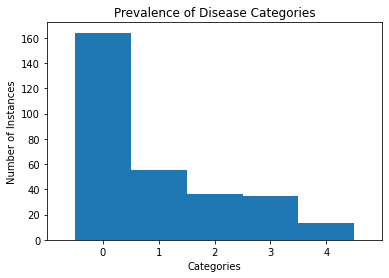

In [3]:
# -------------------- VISUALIZE CLASS DISPARITY -------------------- #

import matplotlib.pyplot as plt

# Construct finite bin labels
bins = np.arange(6) - 0.5

# Plot histogram of the bins
plt.hist(data.disease, bins)
plt.xticks(range(5))
plt.xlim([-1, 5])
plt.title('Prevalence of Disease Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Instances')
plt.show()

In [4]:
from collections import Counter
print('Original class frequencies: %s' % Counter(data.disease))

Original class frequencies: Counter({0: 164, 1: 55, 2: 36, 3: 35, 4: 13})


#### Select the smallest class with only $N$ samples

In this case it looks like we ought to select the $N = 13$, as that is the smallest class, but we run into a problem: if we select this class we will not have enough samples for our MLA. We will discuss a solution to this in our next method. ([source](https://www.kaggle.com/residentmario/undersampling-and-oversampling-imbalanced-data))

In [5]:
# -------------------- IMPUTE MISSING VALUES -------------------- #

# Replace '?' with NaN
data = data.replace('?', np.NaN)

# Import the missing indicator class
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer

# Find missing values using truth table
ind = MissingIndicator(missing_values = np.nan)
MissingValues = ind.fit_transform(data)

# Get indices of missing values
ind_ca = np.where(MissingValues[...,0] == True)
ind_thal = np.where(MissingValues[...,1] == True)

# Set the missing entries to zero
data.ca[ind_ca[0]] = 0
data.thal[ind_thal[0]] = 0

# Set the missing entries to the mean of the feature
data.ca[ind_ca[0]] = data.ca.astype(int).mean()
data.thal[ind_thal[0]] = data.thal.astype(int).mean()

# -------------------- PERFORM UNDER-SAMPLING -------------------- #

# Find original count
from collections import Counter
print('Original class frequencies: %s \t' % Counter(data.disease))

# Import the random under sampler
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RUS and train on algorithm
rus = RandomUnderSampler(random_state=0)
rus.fit(data.iloc[:,0:14], data.disease)

# Create newly sampled data sets
X, y = rus.fit_sample(data.iloc[:,0:14], data.disease)

# Measure new instance frequencies
print('Resampled class frequencies: %s \n' % Counter(y))

Original class frequencies: Counter({0: 164, 1: 55, 2: 36, 3: 35, 4: 13}) 	
Resampled class frequencies: Counter({0: 13, 1: 13, 2: 13, 3: 13, 4: 13}) 



### Over-sampling
Here we randomly duplicate instances of a class until we are left with a balanced dataset.

1. Count the number of examples in each class
2. Select the largest class with $N$ samples
3. Randomly duplicate $N$ examples from each class with fewer instances and put them into a new dataset

In [6]:
# -------------------- CONFIGURE ENVIRONMENT -------------------- #

%reset -f

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import pandas as pd
import numpy as np
from collections import Counter
from pathlib import Path

# Import the random over sampler
from imblearn.over_sampling import RandomOverSampler

# Define subdirectory
data_path = Path('../data')

# Import the data from subdirectory
data = pd.read_csv(data_path / 'cleveland-heart-disease.csv')

# -------------------- IMPUTING MISSING VALUES -------------------- #

# Replace '?' with NaN
data = data.replace('?', np.NaN)

# Import the missing indicator class
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer

# Find missing values using truth table
ind = MissingIndicator(missing_values = np.nan)
MissingValues = ind.fit_transform(data)

# Get indices of missing values
ind_ca = np.where(MissingValues[...,0] == True)
ind_thal = np.where(MissingValues[...,1] == True)

# Set the missing entries to zero
data.ca[ind_ca[0]] = 0
data.thal[ind_thal[0]] = 0

# Set the missing entries to the mean of the feature
data.ca[ind_ca[0]] = data.ca.astype(int).mean()
data.thal[ind_thal[0]] = data.thal.astype(int).mean()

# -------------------- PERFORM OVER-SAMPLING -------------------- #

# Find original count
print('Original class frequencies: %s' % Counter(data.disease))

# Fit and resample data
ros = RandomOverSampler(random_state=0)
ros.fit(data.iloc[:,0:14], data.disease)
X, y = ros.fit_sample(data.iloc[:,0:14], data.disease)

# Measure new instance frequencies
print('Resampled class frequencies: %s' % Counter(y))

Original class frequencies: Counter({0: 164, 1: 55, 2: 36, 3: 35, 4: 13})
Resampled class frequencies: Counter({0: 164, 2: 164, 1: 164, 3: 164, 4: 164})


As we can see, these methods allow us to remove the biases which may occur when gathering data but only by either ommitting data samples or inflating occurances which were not as common originally.

### Synthetic Minority Over-sampling Technique (SMOTE)
Without duplicating nor dropping, we can ramdomly copy individual features for a given class to create new instances which have only a statistical basis in reality as they were never measured in the data gathering phase. In many ways the SMOTE method is a combination of the previous two methods, under and over sampling. Here we will consider *SMOTE Edited Nearest Neighbors (SMOTE-ENN)*.

In [7]:
# -------------------- CONFIGURE ENVIRONMENT -------------------- #

%reset -f

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries
from collections import Counter
from imblearn.combine import SMOTEENN
import pandas as pd
import numpy as np
from pathlib import Path

# Define subdirectory
data_path = Path('../data')

# Import the data from subdirectory
data = pd.read_csv(data_path / 'cleveland-heart-disease.csv')

# -------------------- IMPUTE MISSING VALUES -------------------- #

# Replace '?' with NaN
data = data.replace('?', np.NaN)

# Import the missing indicator class
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer

# Find missing values using truth table
ind = MissingIndicator(missing_values = np.nan)
MissingValues = ind.fit_transform(data)

# Get indices of missing values
ind_ca = np.where(MissingValues[...,0] == True)
ind_thal = np.where(MissingValues[...,1] == True)

# Set the missing entries to zero
data.ca[ind_ca[0]] = 0
data.thal[ind_thal[0]] = 0

# Set the missing entries to the mean of the feature
data.ca[ind_ca[0]] = data.ca.astype(int).mean()
data.thal[ind_thal[0]] = data.thal.astype(int).mean()

# -------------------- PERFORM SMOTE-ENN SAMPLING -------------------- #

# Print original class frequencies
print('Original class frequencies: %s' % Counter(data.disease))

# Fit and resample data
sme = SMOTEENN(random_state=1)
X, y = sme.fit_sample(data.iloc[:,0:14], data.disease)

# Print new dimensions
print('Resampled dataset shape %s' % Counter(y))


Original class frequencies: Counter({0: 164, 1: 55, 2: 36, 3: 35, 4: 13})
Resampled dataset shape Counter({4: 128, 3: 101, 2: 94, 1: 76, 0: 36})


I'll be honest, I don't fully understand the intricate details of `SMOTEENN` and would prefer to stick with the other two options which I understand more intimately.

*Seaborn. Feb 06. 2019.*